In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind

In [2]:
pre_df = pd.read_excel("TeamSmile Pre-Event Survey.xlsx")

In [3]:
post_df =pd.read_excel("TeamSmile Post-Event Survey.xlsx")

pre_df.columns

## some

In [33]:
# Drop first row after header
pre_df = pre_df.iloc[1:].reset_index(drop=True)
pre_df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,location,participation_frequency,age_group,profession,Unnamed: 9,...,familiar_with_OT,familiar_with_IPC,prep_for_collaboration_pre,prior_IPC_experience,yes_OT,yes_dental,yes_other,prior_IPC_experience_time,frequency_collaboration_pre,trust_in_team
0,1.149346e+11,435224173.0,2025-09-08 21:56:44,2025-09-08 21:59:12,166.199.99.128,Kansas City,More than 5 times,35-44,Dentist,NaN,...,Somewhat familiar,Very familiar,Very prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",ABA therapists,Not applicable,Always,Very important
1,1.149334e+11,435224173.0,2025-09-06 13:19:31,2025-09-06 13:23:07,23.120.116.179,Kansas City,3-5 times,25-34,Hygenist,NaN,...,Slightly unfamiliar,Somewhat familiar,Somewhat prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,Not applicable,Sometimes,Important
2,1.149321e+11,435224173.0,2025-09-04 10:46:17,2025-09-04 11:01:35,108.147.176.107,Kansas City,More than 5 times,35-44,Hygenist,NaN,...,Not familiar at all,Somewhat familiar,Somewhat prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,More than 5 years,Sometimes,Very important
3,1.149321e+11,435224173.0,2025-09-04 10:44:21,2025-09-04 10:47:55,172.98.137.25,Kansas City,This is my first time,25-34,Dental Student,NaN,...,Not familiar at all,Somewhat familiar,Not prepared at all,"No, I have not worked on an interprofessional ...",NaN,NaN,NaN,Not applicable,Never,Very important
4,1.149321e+11,435224173.0,2025-09-04 10:44:13,2025-09-04 10:47:09,136.37.72.221,Kansas City,3-5 times,25-34,Dental Student,NaN,...,Not familiar at all,Somewhat familiar,Slightly unprepared,"No, I have not worked on an interprofessional ...",NaN,NaN,NaN,Not applicable,Rarely,Very important


In [13]:
pre_df = pre_df.rename(columns={
    "Which TeamSmile event are you attending?":"location",
    "How many times have you participated in a TeamSmile event?":"participation_frequency",
    "What is your age group?":"age_group",
    "What is your profession?":"profession",
    "What is your current level of training":"training_level",
    "Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?":"recieved_training_IDD",
       "Have you had prior experience working with children with Intellectual and Developmental Disabilities (IDD), either before or after graduation?":"has_experience_IDD",
       "If yes to the previous question, how much experience do you have working with children with IDD?":"experience_IDD_count",
    
    "How often do you interact with children with disabilities in your clinical training or practice?":"interaction_frequency_IDD",
    "How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?":"comfort_level_IDD_pre",
    
    "How often do you incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice?":"PersonCenteredCare_InPractice_pre",
    "How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?":"BPS_knowledge_pre",
   
    "How familiar are you with structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation)?":"SBAR_familiar_pre",
    
    "How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?":"familiar_with_OT_pre",
    "How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?":"familiar_with_IPC_pre",
    "How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?":"prep_for_collaboration_pre",
    "Have you worked as part of an interprofessional team during or after your education? (Select all that apply)":"prior_IPC_experience_pre",
    "Unnamed: 23":"yes_OT", "Unnamed: 24":"yes_dental", "Unnamed: 25":"yes_other",
    "If you have worked on an interprofessional team, how long was your experience?":"prior_IPC_experience_time",
    "How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?":"frequency_collaboration_pre",
    "How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?":"trust_in_team_pre",
      
})



In [11]:
post_df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'Which TeamSmile event are you attending?',
       'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
       'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
       'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
       'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?',
       'What specific skills or insights did you gain from participating in this event?',
       'How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?',
       'After this event, how well do you under

In [18]:
post_df=post_df.rename(columns={
       'Which TeamSmile event are you attending?':'location',
       'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?':'new_exposure_IDD',
       'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?':'comfort_level_IDD_post',
       'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?':'confidence_level_IDD_post_event',
       'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?':'prep_for_collaboration_post',
       'What specific skills or insights did you gain from participating in this event?':'insights_gained',
       'How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?':'PersonCenteredCare_InPractice_post',
       'After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?':'BPS_knowledge_post',
       'How confident are you in applying structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation) in your professional interactions after the event?':'SBAR_familiar_post',
       'Did you use or observe the use of structured communication frameworks such as SBAR during the event?':'use_or_observe_SBR_post',
       'After participating in TeamSmile, how would you rate your understanding of occupational therapy (OT) interventions for patients with IDD during dental appointments? ':'familiar_with_OT_post',
       'How has your understanding of interprofessional collaboration (IPC) in healthcare and the roles of different professionals improved after attending this event?':'prep_for_collaboration_post',
       'Did the interprofessional collaboration during the event improve your understanding of the quality of care provided and the roles of different healthcare professionals?':'frequency_collaboration_post',
       'Did participating in the interprofessional aspect of the event increase your interest in working with other healthcare professionals in the future or with the SHCN population?':'interest_IDD_post',
       'Has your perspective changed regarding the importance of establishing trust with other healthcare providers (e.g., OTs, dentists) to deliver high-quality patient care? ':'trust_in_team_post',
       'Did you feel mutual respect was demonstrated between the different professions during the event?':'respect_IPC',
       'Did the event provide you with opportunities to work as part of an interprofessional team? (Select all that apply)':'prior_IPC_experience_post',
       'Unnamed: 23':'yes_OT', 'Unnamed: 24':'yes_dental', 'Unnamed: 25':'yes_other',
       'If you worked as part of an interprofessional team, how valuable was this experience for your professional development?':'IPC_value_post',
       'How would you rate your overall experience at the TeamSmile event?':'has_experience_event',
       'Would you participate in a TeamSmile event again in the future?':'interest_in_future_events',
       'Did the presence of other healthcare professionals negatively impact treatment time or efficiency? ':'IPC_negative_impact',
       'How do you think the children responded to the interprofessional care they received?':'child_response_IPC',
       'What suggestions do you have to improve future TeamSmile events?':'suggestion'})

In [34]:
post_df =post_df.iloc[1:].reset_index(drop=True)
post_df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,location,new_exposure_IDD,comfort_level_IDD_post,confidence_level_IDD_post_event,...,prior_IPC_experience_post,yes_OT,yes_dental,yes_other,IPC_value_post,has_experience_event,interest_in_future_events,IPC_negative_impact,child_response_IPC,suggestion
0,1.189509e+11,460213498.0,2025-09-11 11:42:33,2025-09-11 11:49:56,204.137.100.61,NaN,Kansas City,Yes,Somewhat more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,It was a wonderful event! Some suggestions I h...
1,1.189495e+11,460213498.0,2025-09-09 20:40:17,2025-09-09 20:47:19,12.75.40.124,NaN,Kansas City,Yes,About the same as before,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Somewhat valuable,Good,Yes,"No, not at all",Somewhat negatively,I believe the workflow could be improved. Alth...
2,1.189494e+11,460213498.0,2025-09-09 16:45:52,2025-09-09 16:56:57,173.197.47.18,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,NaN
3,1.189492e+11,460213498.0,2025-09-09 14:00:20,2025-09-09 14:04:56,108.147.176.107,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",Administrative team,Extremely valuable,Excellent,Yes,"No, no really at all",Very positively,Moving the chair to face the wall and not the ...
4,1.189492e+11,460213498.0,2025-09-09 13:59:57,2025-09-09 14:04:26,172.59.73.251,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",Paraprofessional,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,Different bus arrival times


In [20]:
post_df.to_csv("post.csv", index=False)
pre_df.to_csv("pre.csv", index=False)

In [25]:
# i=0
# for c in post_df.columns:
#     i += 1
#     if c not in ['Respondent ID' ,'Collector ID' ,'Start Date' ,'End Date','Email Address','IP Address']:
#         print(i,post_df[c].unique())
    

In [24]:
print(post_df.nunique())

Respondent ID                         44
Collector ID                           1
Start Date                            41
End Date                              44
IP Address                            42
Email Address                          0
location                               4
new_exposure_IDD                       3
comfort_level_IDD_post                 4
confidence_level_IDD_post_event        5
prep_for_collaboration_post            6
insights_gained                       44
PersonCenteredCare_InPractice_post     3
BPS_knowledge_post                     5
SBAR_familiar_post                     6
use_or_observe_SBR_post                4
familiar_with_OT_post                  4
prep_for_collaboration_post            5
frequency_collaboration_post           5
interest_IDD_post                      4
trust_in_team_post                     4
respect_IPC                            4
prior_IPC_experience_post              1
yes_OT                                 1
yes_dental      

In [27]:
# merged_df = pre_df.merge(post_df, on="Respondent ID", suffixes=("_pre", "_post"))

In [29]:
# len(merged_df)

1

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Assuming your dataframes are already loaded as pre_df and post_df
# If not, uncomment and modify these lines:
# pre_df = pd.read_csv('pre_survey_data.csv')
# post_df = pd.read_csv('post_survey_data.csv')

def setup_plots():
    """Set up matplotlib for better visualization"""
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['legend.fontsize'] = 10

setup_plots()

# ============================================================================
# 1. DEMOGRAPHIC ANALYSIS
# ============================================================================

def plot_demographics(pre_df):
    """Plot demographic characteristics of participants"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Demographic Characteristics of Study Participants', fontsize=16, y=1.02)
    
    # Location distribution
    location_counts = pre_df['location'].value_counts()
    axes[0,0].pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%')
    axes[0,0].set_title('Participants by Location')
    
    # Profession distribution
    profession_counts = pre_df['profession'].value_counts()
    axes[0,1].bar(range(len(profession_counts)), profession_counts.values)
    axes[0,1].set_xticks(range(len(profession_counts)))
    axes[0,1].set_xticklabels(profession_counts.index, rotation=45, ha='right')
    axes[0,1].set_title('Participants by Profession')
    axes[0,1].set_ylabel('Count')
    
    # Age group distribution
    age_counts = pre_df['age_group'].value_counts()
    axes[0,2].bar(range(len(age_counts)), age_counts.values, color='lightcoral')
    axes[0,2].set_xticks(range(len(age_counts)))
    axes[0,2].set_xticklabels(age_counts.index, rotation=45)
    axes[0,2].set_title('Participants by Age Group')
    axes[0,2].set_ylabel('Count')
    
    # Training level distribution
    training_counts = pre_df['training_level'].value_counts()
    axes[1,0].bar(range(len(training_counts)), training_counts.values, color='lightgreen')
    axes[1,0].set_xticks(range(len(training_counts)))
    axes[1,0].set_xticklabels(training_counts.index, rotation=45)
    axes[1,0].set_title('Participants by Training Level')
    axes[1,0].set_ylabel('Count')
    
    # IDD training experience
    training_idd = pre_df['recieved_training_IDD'].value_counts()
    axes[1,1].pie(training_idd.values, labels=training_idd.index, autopct='%1.1f%%', 
                  colors=['lightblue', 'orange'])
    axes[1,1].set_title('Formal IDD Training Received')
    
    # IDD experience
    experience_idd = pre_df['has_experience_IDD'].value_counts()
    axes[1,2].pie(experience_idd.values, labels=experience_idd.index, autopct='%1.1f%%',
                  colors=['lightsteelblue', 'salmon'])
    axes[1,2].set_title('Prior IDD Experience')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# 2. PRE-EVENT BASELINE ANALYSIS
# ============================================================================

def plot_baseline_measures(pre_df):
    """Plot baseline comfort and knowledge measures"""
    
    # Define the measures to analyze
    baseline_measures = [
        'comfort_level_IDD_pre',
        'PersonCenteredCare_InPractice_pre',
        'BPS_knowledge_pre',
        'SBAR_familiar_pre',
        'familiar_with_OT_pre',
        'familiar_with_IPC_pre',
        'prep_for_collaboration_pre'
    ]
    
    # Create labels for better readability
    measure_labels = [
        'Comfort with IDD',
        'Person-Centered Care',
        'BPS Model Knowledge',
        'SBAR Familiarity',
        'OT Familiarity',
        'IPC Familiarity',
        'Collaboration Prep'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Baseline Measures - Pre-Event Assessment', fontsize=16)
    
    # Distribution of all baseline measures
    baseline_data = []
    for measure in baseline_measures:
        if measure in pre_df.columns:
            baseline_data.extend([(label, value) for label, value in 
                                zip([measure_labels[baseline_measures.index(measure)]] * len(pre_df), 
                                    pre_df[measure].dropna())])
    
    baseline_df = pd.DataFrame(baseline_data, columns=['Measure', 'Score'])
    
    # Box plot of all measures
    sns.boxplot(data=baseline_df, x='Measure', y='Score', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Baseline Measures')
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
    axes[0,0].set_ylabel('Score (1-5 scale)')
    
    # Heatmap of mean scores by profession
    if 'profession' in pre_df.columns:
        profession_means = pre_df.groupby('profession')[baseline_measures].mean()
        sns.heatmap(profession_means.T, annot=True, cmap='YlOrRd', ax=axes[0,1])
        axes[0,1].set_title('Mean Baseline Scores by Profession')
        axes[0,1].set_ylabel('Measures')
    
    # Comfort level by IDD experience
    if 'has_experience_IDD' in pre_df.columns and 'comfort_level_IDD_pre' in pre_df.columns:
        sns.boxplot(data=pre_df, x='has_experience_IDD', y='comfort_level_IDD_pre', ax=axes[1,0])
        axes[1,0].set_title('Baseline Comfort by Prior IDD Experience')
        axes[1,0].set_ylabel('Comfort Level')
        axes[1,0].set_xlabel('Prior IDD Experience')
    
    # Correlation matrix
    correlation_data = pre_df[baseline_measures].corr()
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlation Matrix - Baseline Measures')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# 3. PRE-POST COMPARISON ANALYSIS
# ============================================================================

def create_pre_post_comparison(pre_df, post_df):
    """Create pre-post comparison analysis"""
    
    # Map pre-post measures
    comparison_pairs = [
        ('comfort_level_IDD_pre', 'comfort_level_IDD_post', 'Comfort with IDD'),
        ('PersonCenteredCare_InPractice_pre', 'PersonCenteredCare_InPractice_post', 'Person-Centered Care'),
        ('BPS_knowledge_pre', 'BPS_knowledge_post', 'BPS Model Knowledge'),
        ('SBAR_familiar_pre', 'SBAR_familiar_post', 'SBAR Familiarity'),
        ('familiar_with_OT_pre', 'familiar_with_OT_post', 'OT Familiarity'),
        ('prep_for_collaboration_pre', 'prep_for_collaboration_post', 'Collaboration Preparedness')
    ]
    
    # Merge dataframes on participant ID (assuming you have one)
    # If no ID, you might need to merge by order or create an index
    # merged_df = pd.merge(pre_df, post_df, on='participant_id', how='inner')
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Pre-Post Intervention Comparison', fontsize=16)
    
    axes_flat = axes.flatten()
    
    for i, (pre_col, post_col, label) in enumerate(comparison_pairs):
        if i < len(axes_flat):
            # Create sample comparison data (replace with actual merged data)
            # For demonstration, assuming same participants in order
            if pre_col in pre_df.columns and post_col in post_df.columns:
                min_len = min(len(pre_df), len(post_df))
                pre_scores = pre_df[pre_col].iloc[:min_len]
                post_scores = post_df[post_col].iloc[:min_len]
                
                # Before-after plot
                participants = range(min_len)
                axes_flat[i].plot(participants, pre_scores, 'o-', label='Pre', alpha=0.7)
                axes_flat[i].plot(participants, post_scores, 's-', label='Post', alpha=0.7)
                axes_flat[i].set_title(f'{label}')
                axes_flat[i].set_xlabel('Participant')
                axes_flat[i].set_ylabel('Score')
                axes_flat[i].legend()
                axes_flat[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_mean_changes(pre_df, post_df):
    """Plot mean changes from pre to post"""
    
    comparison_pairs = [
        ('comfort_level_IDD_pre', 'comfort_level_IDD_post', 'Comfort with IDD'),
        ('PersonCenteredCare_InPractice_pre', 'PersonCenteredCare_InPractice_post', 'Person-Centered Care'),
        ('BPS_knowledge_pre', 'BPS_knowledge_post', 'BPS Model Knowledge'),
        ('SBAR_familiar_pre', 'SBAR_familiar_post', 'SBAR Familiarity'),
        ('familiar_with_OT_pre', 'familiar_with_OT_post', 'OT Familiarity'),
        ('prep_for_collaboration_pre', 'prep_for_collaboration_post', 'Collaboration Prep')
    ]
    
    mean_changes = []
    labels = []
    pre_means = []
    post_means = []
    
    for pre_col, post_col, label in comparison_pairs:
        if pre_col in pre_df.columns and post_col in post_df.columns:
            pre_mean = pre_df[pre_col].mean()
            post_mean = post_df[post_col].mean()
            change = post_mean - pre_mean
            
            mean_changes.append(change)
            labels.append(label)
            pre_means.append(pre_mean)
            post_means.append(post_mean)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Change scores
    colors = ['green' if x > 0 else 'red' for x in mean_changes]
    bars = ax1.bar(range(len(mean_changes)), mean_changes, color=colors, alpha=0.7)
    ax1.set_xticks(range(len(labels)))
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    ax1.set_title('Mean Score Changes (Post - Pre)')
    ax1.set_ylabel('Score Change')
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, mean_changes):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.2f}', ha='center', va='bottom')
    
    # Pre-post comparison
    x_pos = range(len(labels))
    ax2.bar([p - 0.2 for p in x_pos], pre_means, width=0.4, label='Pre', alpha=0.7)
    ax2.bar([p + 0.2 for p in x_pos], post_means, width=0.4, label='Post', alpha=0.7)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(labels, rotation=45, ha='right')
    ax2.set_title('Mean Scores: Pre vs Post')
    ax2.set_ylabel('Mean Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. STATISTICAL ANALYSIS
# ============================================================================

def perform_statistical_tests(pre_df, post_df):
    """Perform statistical tests for pre-post comparisons"""
    
    comparison_pairs = [
        ('comfort_level_IDD_pre', 'comfort_level_IDD_post', 'Comfort with IDD'),
        ('PersonCenteredCare_InPractice_pre', 'PersonCenteredCare_InPractice_post', 'Person-Centered Care'),
        ('BPS_knowledge_pre', 'BPS_knowledge_post', 'BPS Model Knowledge'),
        ('SBAR_familiar_pre', 'SBAR_familiar_post', 'SBAR Familiarity'),
        ('familiar_with_OT_pre', 'familiar_with_OT_post', 'OT Familiarity'),
        ('prep_for_collaboration_pre', 'prep_for_collaboration_post', 'Collaboration Prep')
    ]
    
    print("STATISTICAL ANALYSIS RESULTS")
    print("=" * 50)
    
    results = []
    
    for pre_col, post_col, label in comparison_pairs:
        if pre_col in pre_df.columns and post_col in post_df.columns:
            # Assuming paired data (same participants)
            min_len = min(len(pre_df), len(post_df))
            pre_scores = pre_df[pre_col].iloc[:min_len].dropna()
            post_scores = post_df[post_col].iloc[:min_len].dropna()
            
            if len(pre_scores) > 0 and len(post_scores) > 0:
                # Paired t-test
                t_stat, p_value = stats.ttest_rel(pre_scores, post_scores)
                
                # Effect size (Cohen's d)
                diff = post_scores - pre_scores
                effect_size = diff.mean() / diff.std()
                
                # Wilcoxon signed-rank test (non-parametric alternative)
                w_stat, w_p_value = stats.wilcoxon(pre_scores, post_scores, alternative='two-sided')
                
                results.append({
                    'Measure': label,
                    'Pre_Mean': pre_scores.mean(),
                    'Post_Mean': post_scores.mean(),
                    'Mean_Diff': post_scores.mean() - pre_scores.mean(),
                    'T_Statistic': t_stat,
                    'P_Value': p_value,
                    'Effect_Size': effect_size,
                    'Wilcoxon_P': w_p_value
                })
                
                print(f"\n{label}:")
                print(f"  Pre Mean: {pre_scores.mean():.2f} (SD: {pre_scores.std():.2f})")
                print(f"  Post Mean: {post_scores.mean():.2f} (SD: {post_scores.std():.2f})")
                print(f"  Mean Difference: {post_scores.mean() - pre_scores.mean():.2f}")
                print(f"  Paired t-test: t = {t_stat:.3f}, p = {p_value:.3f}")
                print(f"  Effect Size (Cohen's d): {effect_size:.3f}")
                print(f"  Wilcoxon test: p = {w_p_value:.3f}")
                
                if p_value < 0.05:
                    print(f"  ** Statistically significant change **")
    
    # Create results dataframe for visualization
    if results:
        results_df = pd.DataFrame(results)
        
        # Plot statistical results
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # P-values
        colors = ['red' if p < 0.05 else 'blue' for p in results_df['P_Value']]
        axes[0].bar(range(len(results_df)), -np.log10(results_df['P_Value']), color=colors, alpha=0.7)
        axes[0].axhline(y=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
        axes[0].set_xticks(range(len(results_df)))
        axes[0].set_xticklabels(results_df['Measure'], rotation=45, ha='right')
        axes[0].set_title('Statistical Significance (-log10 p-value)')
        axes[0].set_ylabel('-log10(p-value)')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Effect sizes
        colors = ['green' if abs(d) > 0.5 else 'orange' if abs(d) > 0.2 else 'red' 
                  for d in results_df['Effect_Size']]
        axes[1].bar(range(len(results_df)), results_df['Effect_Size'], color=colors, alpha=0.7)
        axes[1].set_xticks(range(len(results_df)))
        axes[1].set_xticklabels(results_df['Measure'], rotation=45, ha='right')
        axes[1].set_title('Effect Sizes (Cohen\'s d)')
        axes[1].set_ylabel('Effect Size')
        axes[1].axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='Small')
        axes[1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Medium')
        axes[1].axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Large')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Mean differences
        axes[2].bar(range(len(results_df)), results_df['Mean_Diff'], 
                   color=['green' if x > 0 else 'red' for x in results_df['Mean_Diff']], alpha=0.7)
        axes[2].set_xticks(range(len(results_df)))
        axes[2].set_xticklabels(results_df['Measure'], rotation=45, ha='right')
        axes[2].set_title('Mean Score Changes')
        axes[2].set_ylabel('Mean Difference (Post - Pre)')
        axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.5)
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return results_df

# ============================================================================
# 5. SUBGROUP ANALYSIS
# ============================================================================

def plot_subgroup_analysis(pre_df, post_df):
    """Analyze outcomes by different subgroups"""
    
    # Assuming you can match participants between pre and post
    # This is a simplified version - you'll need to adapt based on your data structure
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Subgroup Analysis', fontsize=16)
    
    # Analysis by location
    if 'location' in pre_df.columns:
        location_pre = pre_df.groupby('location')['comfort_level_IDD_pre'].mean()
        # You'll need to map this to post data appropriately
        axes[0,0].bar(location_pre.index, location_pre.values, alpha=0.7, label='Pre')
        axes[0,0].set_title('Comfort Level by Location')
        axes[0,0].set_ylabel('Mean Comfort Score')
        axes[0,0].legend()
    
    # Analysis by profession
    if 'profession' in pre_df.columns:
        prof_comfort = pre_df.groupby('profession')['comfort_level_IDD_pre'].mean()
        axes[0,1].bar(range(len(prof_comfort)), prof_comfort.values, alpha=0.7)
        axes[0,1].set_xticks(range(len(prof_comfort)))
        axes[0,1].set_xticklabels(prof_comfort.index, rotation=45, ha='right')
        axes[0,1].set_title('Pre-Event Comfort by Profession')
        axes[0,1].set_ylabel('Mean Comfort Score')
    
    # Analysis by prior IDD experience
    if 'has_experience_IDD' in pre_df.columns:
        exp_comfort = pre_df.groupby('has_experience_IDD')['comfort_level_IDD_pre'].mean()
        axes[1,0].bar(exp_comfort.index, exp_comfort.values, alpha=0.7, color='coral')
        axes[1,0].set_title('Pre-Event Comfort by Prior IDD Experience')
        axes[1,0].set_ylabel('Mean Comfort Score')
    
    # Analysis by formal training
    if 'recieved_training_IDD' in pre_df.columns:
        training_comfort = pre_df.groupby('recieved_training_IDD')['comfort_level_IDD_pre'].mean()
        axes[1,1].bar(training_comfort.index, training_comfort.values, alpha=0.7, color='lightgreen')
        axes[1,1].set_title('Pre-Event Comfort by Formal IDD Training')
        axes[1,1].set_ylabel('Mean Comfort Score')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# 6. POST-EVENT SPECIFIC ANALYSIS
# ============================================================================

def plot_post_event_measures(post_df):
    """Plot post-event specific measures"""
    
    post_specific = [
        'new_exposure_IDD',
        'confidence_level_IDD_post_event', 
        'interest_IDD_post',
        'respect_IPC',
        'IPC_value_post'
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Post-Event Specific Measures', fontsize=16)
    
    # New exposure to IDD
    if 'new_exposure_IDD' in post_df.columns:
        exposure_counts = post_df['new_exposure_IDD'].value_counts()
        axes[0,0].pie(exposure_counts.values, labels=exposure_counts.index, autopct='%1.1f%%')
        axes[0,0].set_title('New Exposure to IDD Care')
    
    # Confidence level
    if 'confidence_level_IDD_post_event' in post_df.columns:
        axes[0,1].hist(post_df['confidence_level_IDD_post_event'].dropna(), bins=5, alpha=0.7, edgecolor='black')
        axes[0,1].set_title('Confidence Level Post-Event')
        axes[0,1].set_xlabel('Confidence Score')
        axes[0,1].set_ylabel('Frequency')
    
    # Interest in future IDD work
    if 'interest_IDD_post' in post_df.columns:
        interest_counts = post_df['interest_IDD_post'].value_counts()
        axes[0,2].bar(range(len(interest_counts)), interest_counts.values, color='skyblue', alpha=0.7)
        axes[0,2].set_xticks(range(len(interest_counts)))
        axes[0,2].set_xticklabels(interest_counts.index, rotation=45, ha='right')
        axes[0,2].set_title('Increased Interest in IDD Work')
        axes[0,2].set_ylabel('Count')
    
    # Mutual respect observed
    if 'respect_IPC' in post_df.columns:
        respect_counts = post_df['respect_IPC'].value_counts()
        axes[1,0].pie(respect_counts.values, labels=respect_counts.index, autopct='%1.1f%%')
        axes[1,0].set_title('Mutual Respect Between Professions')
    
    # Value of IPC experience
    if 'IPC_value_post' in post_df.columns:
        axes[1,1].hist(post_df['IPC_value_post'].dropna(), bins=5, alpha=0.7, 
                      color='lightgreen', edgecolor='black')
        axes[1,1].set_title('Value of IPC Experience')
        axes[1,1].set_xlabel('Value Rating')
        axes[1,1].set_ylabel('Frequency')
    
    # Overall event rating
    if 'has_experience_event' in post_df.columns:
        axes[1,2].hist(post_df['has_experience_event'].dropna(), bins=5, alpha=0.7, 
                      color='gold', edgecolor='black')
        axes[1,2].set_title('Overall Event Experience')
        axes[1,2].set_xlabel('Experience Rating')
        axes[1,2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



In [ ]:
# # ============================================================================
# # 7. MAIN EXECUTION FUNCTION
# # ============================================================================

# # def run_complete_analysis(pre_df, post_df):
#     """Run complete exploratory data analysis"""
    
#     print("Starting TeamSmile IDD Study - Exploratory Data Analysis")
#     print("=" * 60)
    
#     # Basic data info
#     print(f"Pre-survey participants: {len(pre_df)}")
#     print(f"Post-survey participants: {len(post_df)}")
#     print(f"Pre-survey columns: {len(pre_df.columns)}")
#     print(f"Post-survey columns: {len(post_df.columns)}")
    
#     # 1. Demographics
#     print("\n1. Plotting demographic characteristics...")
#     plot_demographics(pre_df)
    
#     # 2. Baseline measures
#     print("\n2. Analyzing baseline measures...")
#     plot_baseline_measures(pre_df)
    
#     # 3. Pre-post comparison
#     print("\n3. Creating pre-post comparisons...")
#     create_pre_post_comparison(pre_df, post_df)
#     plot_mean_changes(pre_df, post_df)
    
#     # 4. Statistical analysis
#     print("\n4. Performing statistical tests...")
#     results_df = perform_statistical_tests(pre_df, post_df)
    
#     # 5. Subgroup analysis
#     print("\n5. Analyzing subgroups...")
#     plot_subgroup_analysis(pre_df, post_df)
    
#     # 6. Post-event specific measures
#     print("\n6. Analyzing post-event specific measures...")
#     plot_post_event_measures(post_df)
    
#     print("\nAnalysis complete!")
#     return results_df




1. Plotting demographic characteristics...


KeyError: 'training_level'

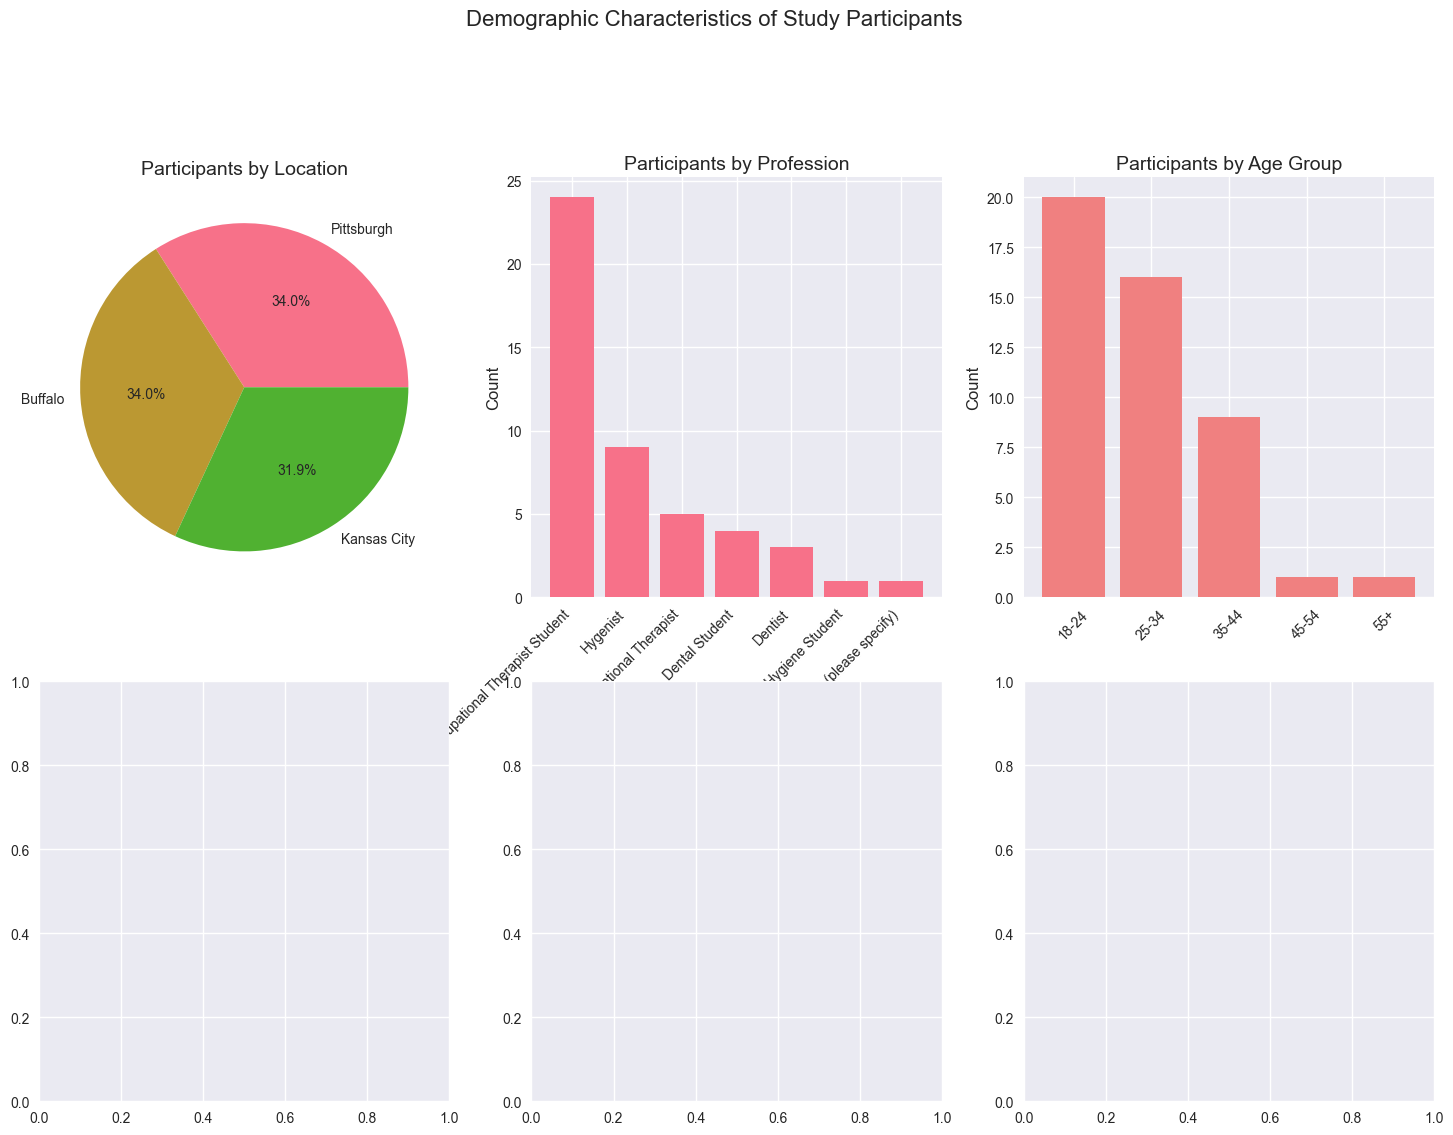

In [35]:
# 1. Demographics
print("\n1. Plotting demographic characteristics...")
plot_demographics(pre_df)
    

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set custom palette
brand_colors = ["#ffc72c", "#002f56", "#2f9fd0"]

def setup_plots():
    """Set up matplotlib for consistent style"""
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['legend.fontsize'] = 10

setup_plots()

# ============================================================================
# DEMOGRAPHIC ANALYSIS
# ============================================================================

def plot_demographics(pre_df):
    """Plot demographic characteristics of participants"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Demographic Characteristics of Study Participants', 
                 fontsize=16, y=1.02)
    
    # Location distribution (Pie)
    location_counts = pre_df['location'].value_counts()
    axes[0,0].pie(location_counts.values, 
                  labels=location_counts.index, 
                  autopct='%1.1f%%',
                  colors=brand_colors)
    axes[0,0].set_title('Participants by Location')
    
    # Profession distribution (Bar)
    profession_counts = pre_df['profession'].value_counts()
    axes[0,1].bar(profession_counts.index, profession_counts.values, 
                  color=brand_colors[0])
    axes[0,1].set_xticklabels(profession_counts.index, rotation=45, ha='right')
    axes[0,1].set_title('Participants by Profession')
    axes[0,1].set_ylabel('Count')
    
    # Age group distribution (Bar) — optional
    if 'age_group' in pre_df.columns:
        age_counts = pre_df['age_group'].value_counts()
        axes[0,2].bar(age_counts.index, age_counts.values, 
                      color=brand_colors[1])
        axes[0,2].set_xticklabels(age_counts.index, rotation=45)
        axes[0,2].set_title('Participants by Age Group')
        axes[0,2].set_ylabel('Count')
    else:
        axes[0,2].axis("off")
    
    # # Training level distribution (Bar) — optional
    # if 'training_level' in pre_df.columns:
    #     training_counts = pre_df['training_level'].value_counts()
    #     axes[1,0].bar(training_counts.index, training_counts.values, 
    #                   color=brand_colors[2])
    #     axes[1,0].set_xticklabels(training_counts.index, rotation=45)
    #     axes[1,0].set_title('Participants by Training Level')
    #     axes[1,0].set_ylabel('Count')
    # else:
    #     axes[1,0].axis("off")
    
    # # Formal IDD Training (Pie)
    # if 'recieved_training_IDD' in pre_df.columns:
    #     training_idd = pre_df['recieved_training_IDD'].value_counts()
    #     axes[1,1].pie(training_idd.values, 
    #                   labels=training_idd.index, 
    #                   autopct='%1.1f%%',
    #                   colors=brand_colors)
    #     axes[1,1].set_title('Formal IDD Training Received')
    # else:
    #     axes[1,1].axis("off")
    
    # # Prior IDD Experience (Pie)
    # if 'has_experience_IDD' in pre_df.columns:
    #     experience_idd = pre_df['has_experience_IDD'].value_counts()
    #     axes[1,2].pie(experience_idd.values, 
    #                   labels=experience_idd.index, 
    #                   autopct='%1.1f%%',
    #                   colors=brand_colors)
    #     axes[1,2].set_title('Prior IDD Experience')
    # else:
    #     axes[1,2].axis("off")
    
    plt.tight_layout()
    plt.show()



1. Plotting demographic characteristics...


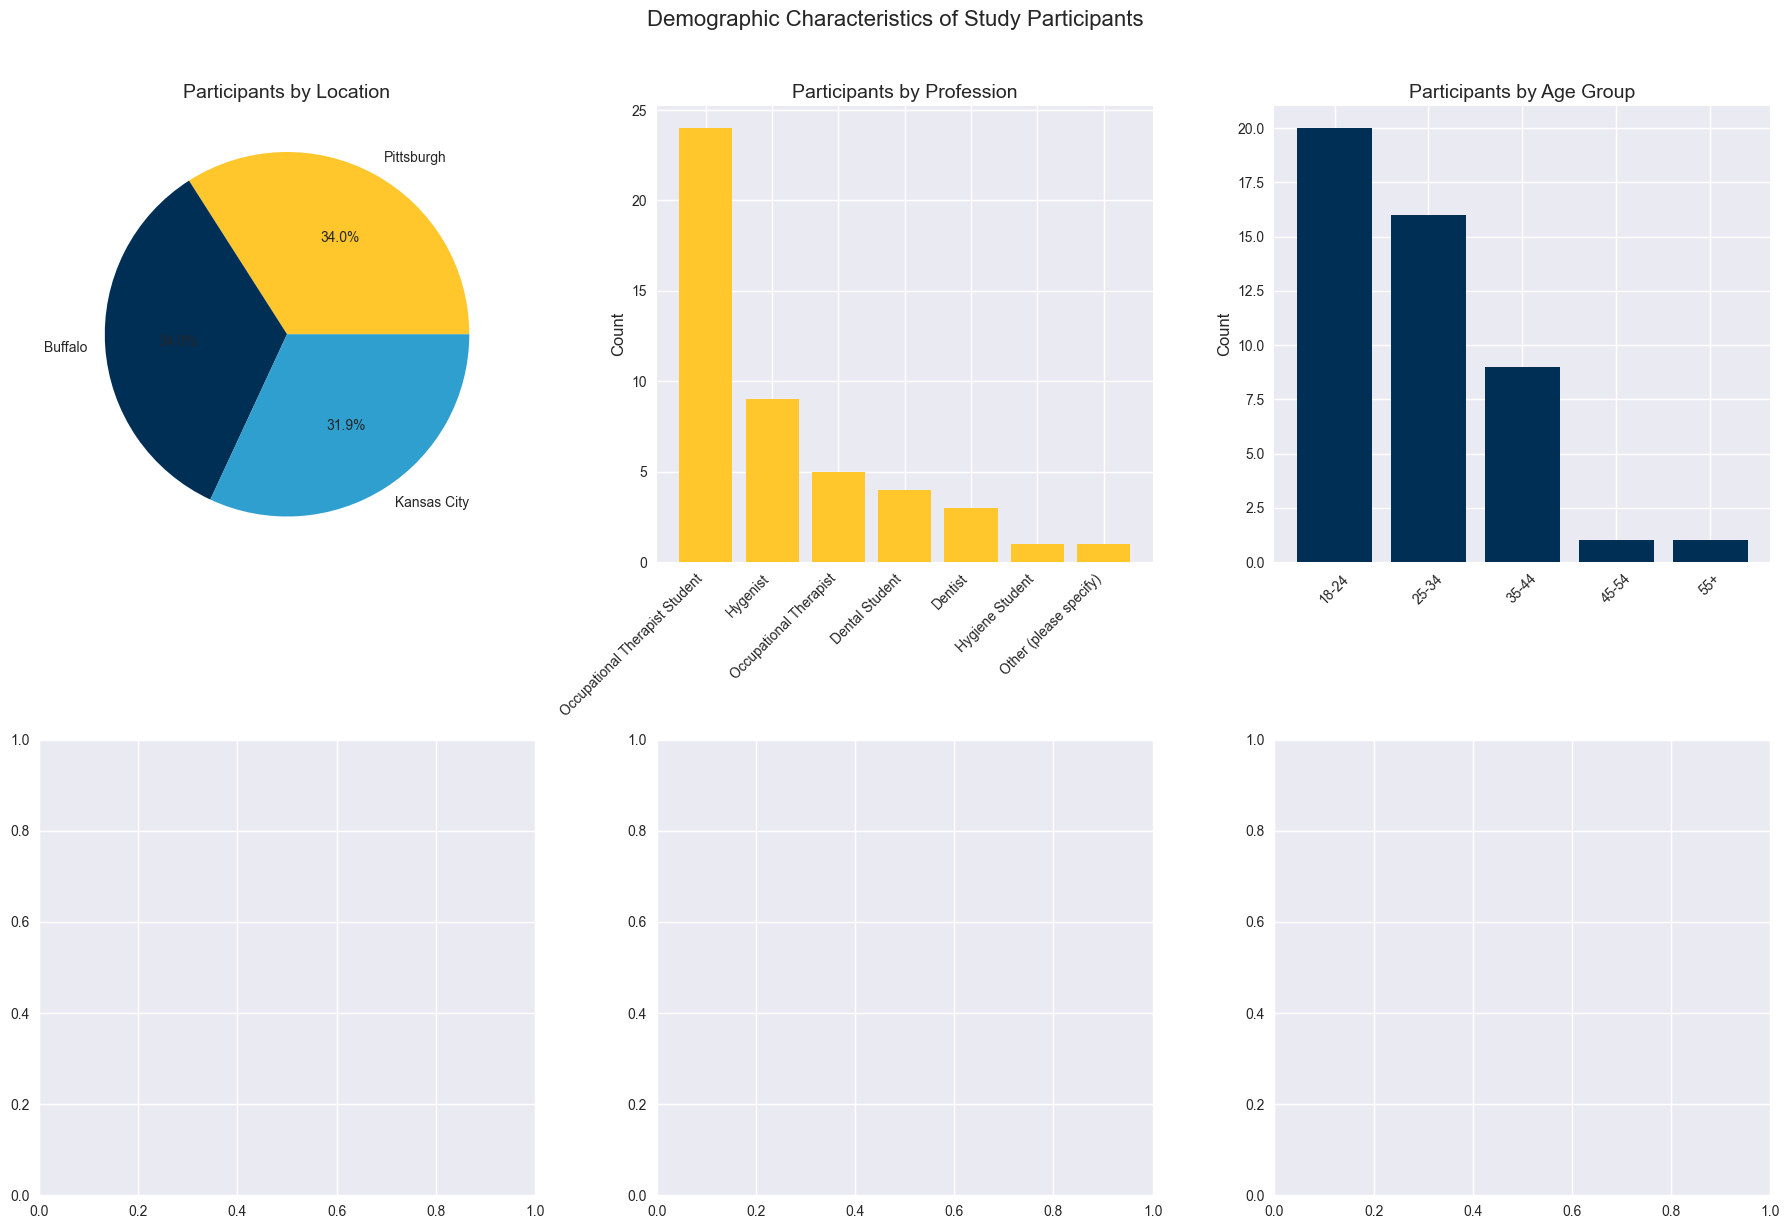

In [37]:
# 1. Demographics
print("\n1. Plotting demographic characteristics...")
plot_demographics(pre_df)

KeyError: "Columns not found: 'prep_for_collaboration'"

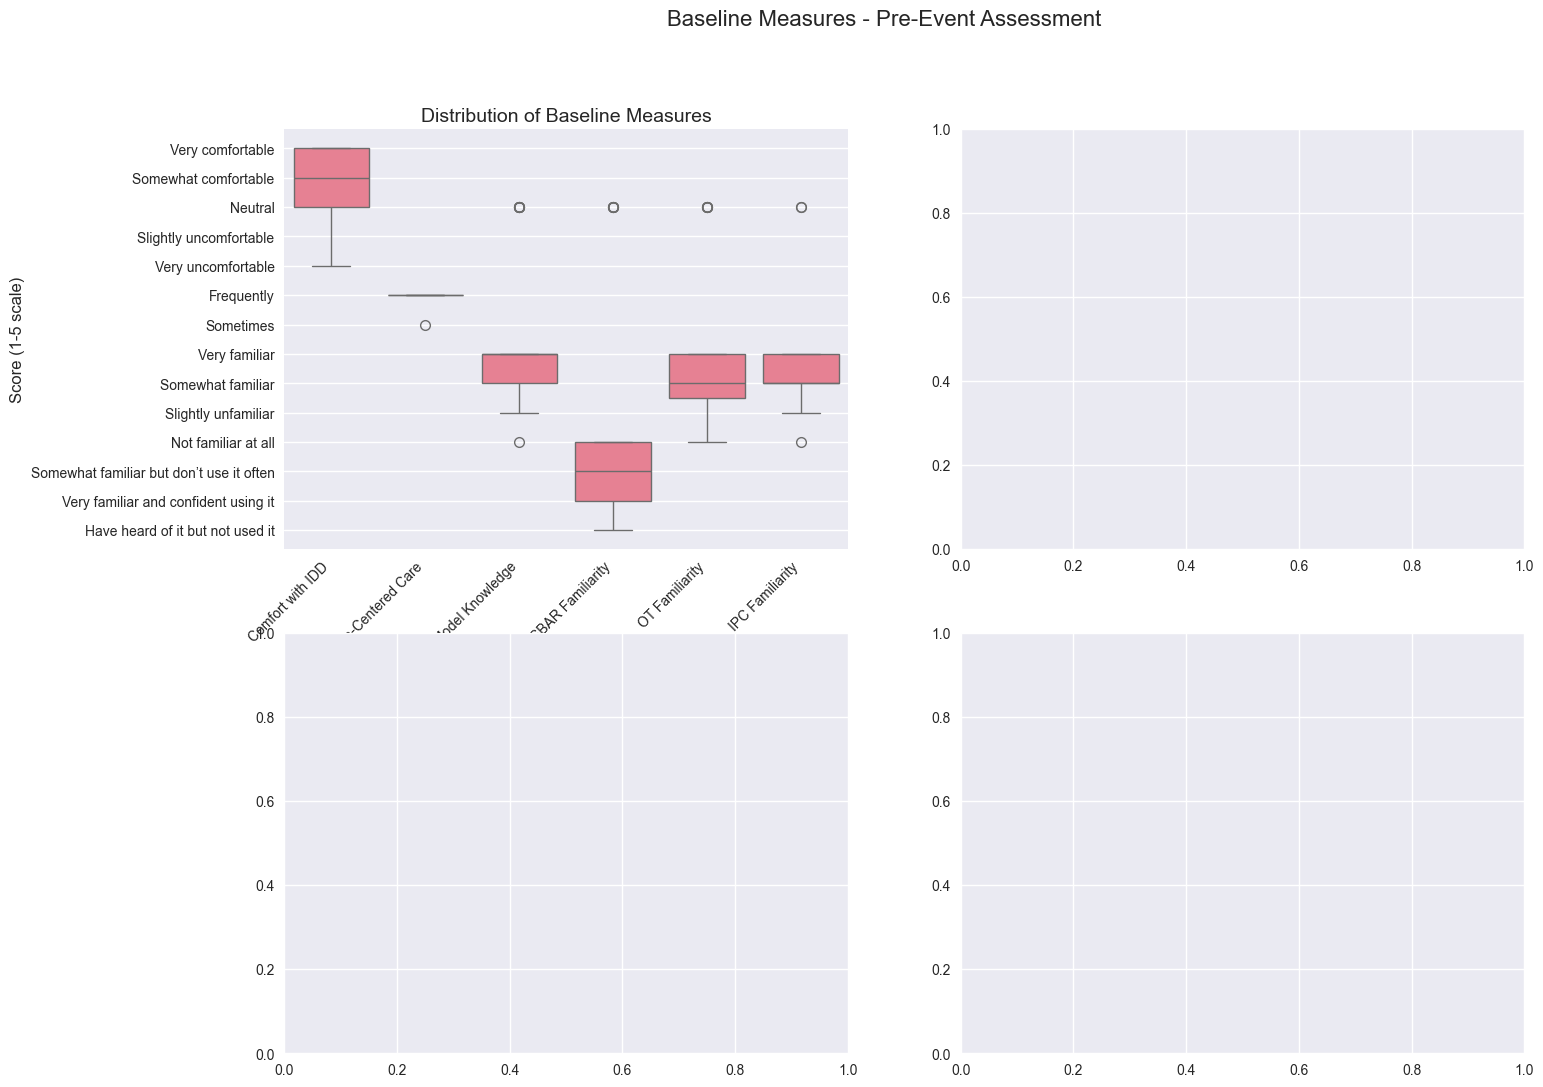

In [42]:
plot_baseline_measures(pre_df)

In [41]:
# ============================================================================
# 2. PRE-EVENT BASELINE ANALYSIS
# ============================================================================

def plot_baseline_measures(pre_df):
    """Plot baseline comfort and knowledge measures"""
    
    # Define the measures to analyze
    baseline_measures = [
        'comfort_level_IDD',
        'PersonCenteredCare_InPractice',
        'BPS_knowledge',
        'SBAR_familiar',
        'familiar_with_OT',
        'familiar_with_IPC',
        'prep_for_collaboration'
    ]
    
    # Create labels for better readability
    measure_labels = [
        'Comfort with IDD',
        'Person-Centered Care',
        'BPS Model Knowledge',
        'SBAR Familiarity',
        'OT Familiarity',
        'IPC Familiarity',
        'Collaboration Prep'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Baseline Measures - Pre-Event Assessment', fontsize=16)
    
    # Distribution of all baseline measures
    baseline_data = []
    for measure in baseline_measures:
        if measure in pre_df.columns:
            baseline_data.extend([(label, value) for label, value in 
                                zip([measure_labels[baseline_measures.index(measure)]] * len(pre_df), 
                                    pre_df[measure].dropna())])
    
    baseline_df = pd.DataFrame(baseline_data, columns=['Measure', 'Score'])
    
    # Box plot of all measures
    sns.boxplot(data=baseline_df, x='Measure', y='Score', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Baseline Measures')
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
    axes[0,0].set_ylabel('Score (1-5 scale)')
    
    # Heatmap of mean scores by profession
    if 'profession' in pre_df.columns:
        profession_means = pre_df.groupby('profession')[baseline_measures].mean()
        sns.heatmap(profession_means.T, annot=True, cmap='YlOrRd', ax=axes[0,1])
        axes[0,1].set_title('Mean Baseline Scores by Profession')
        axes[0,1].set_ylabel('Measures')
    
    # Comfort level by IDD experience
    if 'has_experience_IDD' in pre_df.columns and 'comfort_level_IDD_pre' in pre_df.columns:
        sns.boxplot(data=pre_df, x='has_experience_IDD', y='comfort_level_IDD_pre', ax=axes[1,0])
        axes[1,0].set_title('Baseline Comfort by Prior IDD Experience')
        axes[1,0].set_ylabel('Comfort Level')
        axes[1,0].set_xlabel('Prior IDD Experience')
    
    # Correlation matrix
    correlation_data = pre_df[baseline_measures].corr()
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlation Matrix - Baseline Measures')
    
    plt.tight_layout()
    plt.show()

In [40]:
pre_df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'location', 'participation_frequency', 'age_group', 'profession',
       'Unnamed: 9', 'What is your current level of training?',
       'recieved_training_IDD', 'has_experience_IDD', 'experience_IDD_count',
       'interaction_frequency_IDD', 'comfort_level_IDD',
       'PersonCenteredCare_InPractice', 'BPS_knowledge', 'SBAR_familiar',
       'familiar_with_OT', 'familiar_with_IPC', 'prep_for_collaboration_pre',
       'prior_IPC_experience', 'yes_OT', 'yes_dental', 'yes_other',
       'prior_IPC_experience_time', 'frequency_collaboration_pre',
       'trust_in_team'],
      dtype='object')

In [43]:
print(pre_df.nunique())

Respondent ID                              47
Collector ID                                1
Start Date                                 41
End Date                                   46
IP Address                                 43
location                                    3
participation_frequency                     4
age_group                                   5
profession                                  7
Unnamed: 9                                  1
What is your current level of training?     5
recieved_training_IDD                       2
has_experience_IDD                          2
experience_IDD_count                        6
interaction_frequency_IDD                   4
comfort_level_IDD                           5
PersonCenteredCare_InPractice               2
BPS_knowledge                               5
SBAR_familiar                               5
familiar_with_OT                            5
familiar_with_IPC                           5
prep_for_collaboration_pre        

## new

In [62]:
pre_final= pd.read_csv("pre_final.csv")

In [55]:
post_final = pd.read_csv("post_final.csv")

In [63]:
pre_final = pre_final.rename(columns={
    "Which TeamSmile event are you attending?":"location",
    "How many times have you participated in a TeamSmile event?":"participation_frequency",
    "What is your age group?":"age_group",
    "What is your profession?":"profession",
    "What is your current level of training?":"training_level",
    "Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?":"recieved_training_IDD",
       "Have you had prior experience working with children with Intellectual and Developmental Disabilities (IDD), either before or after graduation?":"has_experience_IDD",
       "If yes to the previous question, how much experience do you have working with children with IDD?":"experience_IDD_count",
    
    "How often do you interact with children with disabilities in your clinical training or practice?":"interaction_frequency_IDD",
    "How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?":"comfort_level_IDD_pre",
    
    "How often do you incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice?":"PersonCenteredCare_InPractice_pre",
    "How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?":"BPS_knowledge_pre",
   
    "SBAR How familiar are you with structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation)?":"SBAR_familiar_pre",
    
    "How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?":"familiar_with_OT_pre",
    "How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?":"familiar_with_IPC_pre",
    "How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?":"prep_for_collaboration_pre",
    "Have you worked as part of an interprofessional team during or after your education? (Select all that apply)":"prior_IPC_experience_pre",
    "Unnamed: 23":"yes_OT", "Unnamed: 24":"yes_dental", "Unnamed: 25":"yes_other",
    "If you have worked on an interprofessional team, how long was your experience?":"prior_IPC_experience_time",
    "How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?":"frequency_collaboration_pre",
    "How important is it for you to establish trust with other healthcare providers to provide high-qualityIPC_experience_post care for patients?":"trust_in_team_pre",
      
})



In [76]:
post_final=post_final.rename(columns={
       'Which TeamSmile event are you attending?':'location',
       'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?':'new_exposure_IDD',
       'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?':'comfort_level_IDD_post',
       'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?':'confidence_level_IDD_post_event',
       'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?':'prep_for_collaboration_post',
       'What specific skills or insights did you gain from participating in this event?':'insights_gained',
       'How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?':'PersonCenteredCare_InPractice_post',
       'After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?':'BPS_knowledge_post',
       'How confident are you in applying structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation) in your professional interactions after the event?':'SBAR_familiar_post',
       'Did you use or observe the use of structured communication frameworks such as SBAR during the event?':'use_or_observe_SBR_post',
       'After participating in TeamSmile, how would you rate your understanding of occupational therapy (OT) interventions for patients with IDD during dental appointments?':'familiar_with_OT_post',
       'How has your understanding of interprofessional collaboration (IPC) in healthcare and the roles of different professionals improved after attending this event?':'IPC_experience_post',
       'Did the interprofessional collaboration during the event improve your understanding of the quality of care provided and the roles of different healthcare professionals?':'frequency_collaboration_post',
       'Did participating in the interprofessional aspect of the event increase your interest in working with other healthcare professionals in the future or with the SHCN population?':'interest_IDD_post',
       'Has your perspective changed regarding the importance of establishing trust with other healthcare providers (e.g., OTs, dentists) to deliver high-quality patient care?':'trust_in_team_post',
       'Did you feel mutual respect was demonstrated between the different professions during the event?':'respect_IPC',
       'Did the event provide you with opportunities to work as part of an interprofessional team? (Select all that apply)':'prior_IPC_experience_post',
       'Unnamed: 23':'yes_OT', 'Unnamed: 24':'yes_dental', 'Unnamed: 25':'yes_other',
       'If you worked as part of an interprofessional team, how valuable was this experience for your professional development?':'IPC_value_post',
       'How would you rate your overall experience at the TeamSmile event?':'has_experience_event',
       'Would you participate in a TeamSmile event again in the future?':'interest_in_future_events',
        'Did the presence of other healthcare professionals negatively impact treatment time or efficiency?':'IPC_negative_impact',
       'How do you think the children responded to the interprofessional care they received?':'child_response_IPC',
       'What suggestions do you have to improve future TeamSmile events?':'suggestion'})

In [65]:
pre_final.nunique()

Respondent ID                         1
Collector ID                          1
Start Date                           42
End Date                             47
IP Address                           44
NAMES                                48
ID#                                  48
location                              3
participation_frequency               4
age_group                             5
profession                            7
Unnamed: 11                           1
training_level                        5
recieved_training_IDD                 2
has_experience_IDD                    2
experience_IDD_count                  6
interaction_frequency_IDD             4
comfort_level_IDD_pre                 5
PersonCenteredCare_InPractice_pre     2
BPS_knowledge_pre                     5
SBAR_familiar_pre                     5
familiar_with_OT_pre                  5
familiar_with_IPC_pre                 5
prep_for_collaboration_pre            5
prior_IPC_experience_pre              1


In [77]:
post_final.nunique()

Respondent ID                          1
Collector ID                           1
Start Date                            41
End Date                              43
IP Address                            41
Unnamed: 5                             9
name                                  43
ID#                                   43
location                               3
new_exposure_IDD                       2
comfort_level_IDD_post                 3
confidence_level_IDD_post_event        4
prep_for_collaboration_post            5
insights_gained                       42
PersonCenteredCare_InPractice_post     2
BPS_knowledge_post                     4
SBAR_familiar_post                     5
use_or_observe_SBR_post                3
familiar_with_OT_post                  3
prep_for_collaboration_post            4
frequency_collaboration_post           4
interest_IDD_post                      3
trust_in_team_post                     3
respect_IPC                            3
prior_IPC_experi

In [58]:
post_final.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Unnamed: 5', 'NAME', 'PostNAME', 'ID#', 'location', 'new_exposure_IDD',
       'comfort_level_IDD_post', 'confidence_level_IDD_post_event',
       'prep_for_collaboration_post', 'insights_gained',
       'PersonCenteredCare_InPractice_post', 'BPS_knowledge_post',
       'SBAR_familiar_post', 'use_or_observe_SBR_post',
       'familiar_with_OT_post', 'prep_for_collaboration_post',
       'frequency_collaboration_post', 'interest_IDD_post',
       'trust_in_team_post', 'respect_IPC', 'prior_IPC_experience_post',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'IPC_value_post',
       'has_experience_event', 'interest_in_future_events',
       'IPC_negative_impact', 'child_response_IPC', 'suggestion'],
      dtype='object')

In [64]:
pre_final.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'NAMES', 'ID#', 'location', 'participation_frequency', 'age_group',
       'profession', 'Unnamed: 11', 'training_level', 'recieved_training_IDD',
       'has_experience_IDD', 'experience_IDD_count',
       'interaction_frequency_IDD', 'comfort_level_IDD_pre',
       'PersonCenteredCare_InPractice_pre', 'BPS_knowledge_pre',
       'SBAR_familiar_pre', 'familiar_with_OT_pre', 'familiar_with_IPC_pre',
       'prep_for_collaboration_pre', 'prior_IPC_experience_pre', 'yes_other',
       'Unnamed: 26', 'Unnamed: 27', 'prior_IPC_experience_time',
       'frequency_collaboration_pre', 'trust_in_team_pre'],
      dtype='object')

In [79]:
# Standardize name columns
pre_final = pre_final.rename(columns={"NAMES": "name"})
post_final = post_final.rename(columns={"NAME": "name"})

# Optionally drop PostNAME if it's just duplicate info
if "PostNAME" in post_final.columns:
    post_final = post_final.drop(columns=["PostNAME"])

# Merge on name
merged_df = pd.merge(pre_final, post_final, on="name", how="inner")

# Save merged file
merged_df.to_csv("merged_pre_post.csv", index=False)


In [80]:
merged_df.head()

,Respondent ID_x,Collector ID_x,Start Date_x,End Date_x,IP Address_x,name,ID#_x,location_x,participation_frequency,age_group,...,prior_IPC_experience_post,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28,IPC_value_post,has_experience_event,interest_in_future_events,IPC_negative_impact,child_response_IPC,suggestion
0,1.150000e+11,435224173,2025-04-04 9:03:55,2025-04-04 9:07:55,174.208.33.96,MO,33,Buffalo,This is my first time,35-44,...,NaN,"Yes, with Occupational Therapists",NaN,NaN,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,I would suggest to keep one extra hygiene chai...
1,1.150000e+11,435224173,2025-09-04 10:44:21,2025-09-04 10:47:55,172.98.137.25,AG,2,Kansas City,This is my first time,25-34,...,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,Somewhat valuable,Good,Yes,"No, not at all",Very positively,No comment
2,1.150000e+11,435224173,2025-04-04 9:04:03,2025-04-04 9:08:35,151.181.86.221,AO,6,Buffalo,3-5 times,35-44,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"Yes, somewhat",Very positively,NaN
3,1.150000e+11,435224173,2025-04-04 9:02:25,2025-04-04 9:06:04,174.208.33.106,JO,21,Buffalo,This is my first time,25-34,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",people coordinating the event,Extremely valuable,Excellent,Yes,"No, no really at all",Somewhat positively,I would definitely suggest more chairs next ti...
4,1.150000e+11,435224173,2025-09-03 14:10:55,2025-09-03 14:17:10,136.33.222.182,LO,28,Kansas City,This is my first time,18-24,...,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"Yes, significantly",Very positively,More toys and I interact with !


In [78]:
len(merged_df.columns),len(pre_final.columns),len(post_final.columns)

(64, 31, 34)

In [73]:
import plotly.express as px

In [72]:
# pip install plotly

In [81]:
# Bar chart comparing counts of responses (pre vs post)
fig1 = px.histogram(
    merged_df,
    x="BPS_knowledge_pre",
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event BPS Knowledge Distribution"
)
fig1.update_layout(xaxis_title="BPS Knowledge (Pre)", yaxis_title="Count")
fig1.show()

fig2 = px.histogram(
    merged_df,
    x="BPS_knowledge_post",
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event BPS Knowledge Distribution"
)
fig2.update_layout(xaxis_title="BPS Knowledge (Post)", yaxis_title="Count")
fig2.show()




DuplicateError: Expected unique column names, got:
- 'prep_for_collaboration_post' 2 times

In [82]:
merged_df.columns

Index(['Respondent ID_x', 'Collector ID_x', 'Start Date_x', 'End Date_x',
       'IP Address_x', 'name', 'ID#_x', 'location_x',
       'participation_frequency', 'age_group', 'profession', 'Unnamed: 11',
       'training_level', 'recieved_training_IDD', 'has_experience_IDD',
       'experience_IDD_count', 'interaction_frequency_IDD',
       'comfort_level_IDD_pre', 'PersonCenteredCare_InPractice_pre',
       'BPS_knowledge_pre', 'SBAR_familiar_pre', 'familiar_with_OT_pre',
       'familiar_with_IPC_pre', 'prep_for_collaboration_pre',
       'prior_IPC_experience_pre', 'yes_other', 'Unnamed: 26_x',
       'Unnamed: 27_x', 'prior_IPC_experience_time',
       'frequency_collaboration_pre', 'trust_in_team_pre', 'Respondent ID_y',
       'Collector ID_y', 'Start Date_y', 'End Date_y', 'IP Address_y',
       'Unnamed: 5', 'ID#_y', 'location_y', 'new_exposure_IDD',
       'comfort_level_IDD_post', 'confidence_level_IDD_post_event',
       'prep_for_collaboration_post', 'insights_gained',
    